In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [56]:
df=pd.read_csv('/content/Wholesale customers data.csv')

In [57]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [58]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


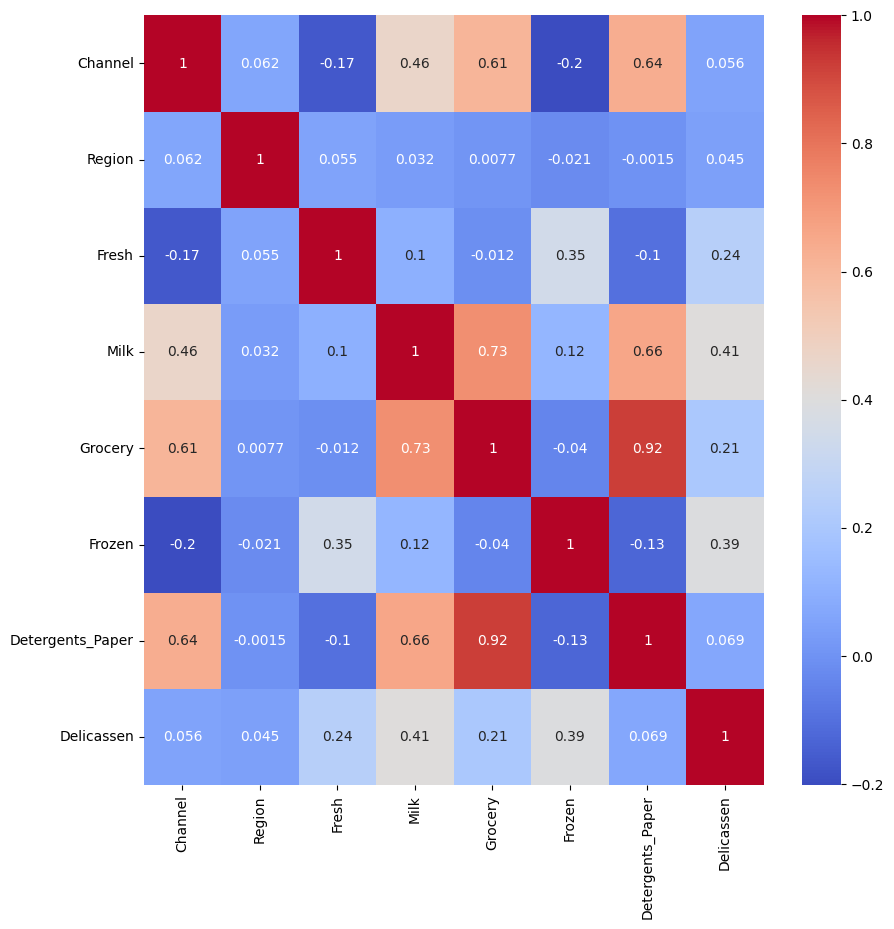

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x1000 with 0 Axes>

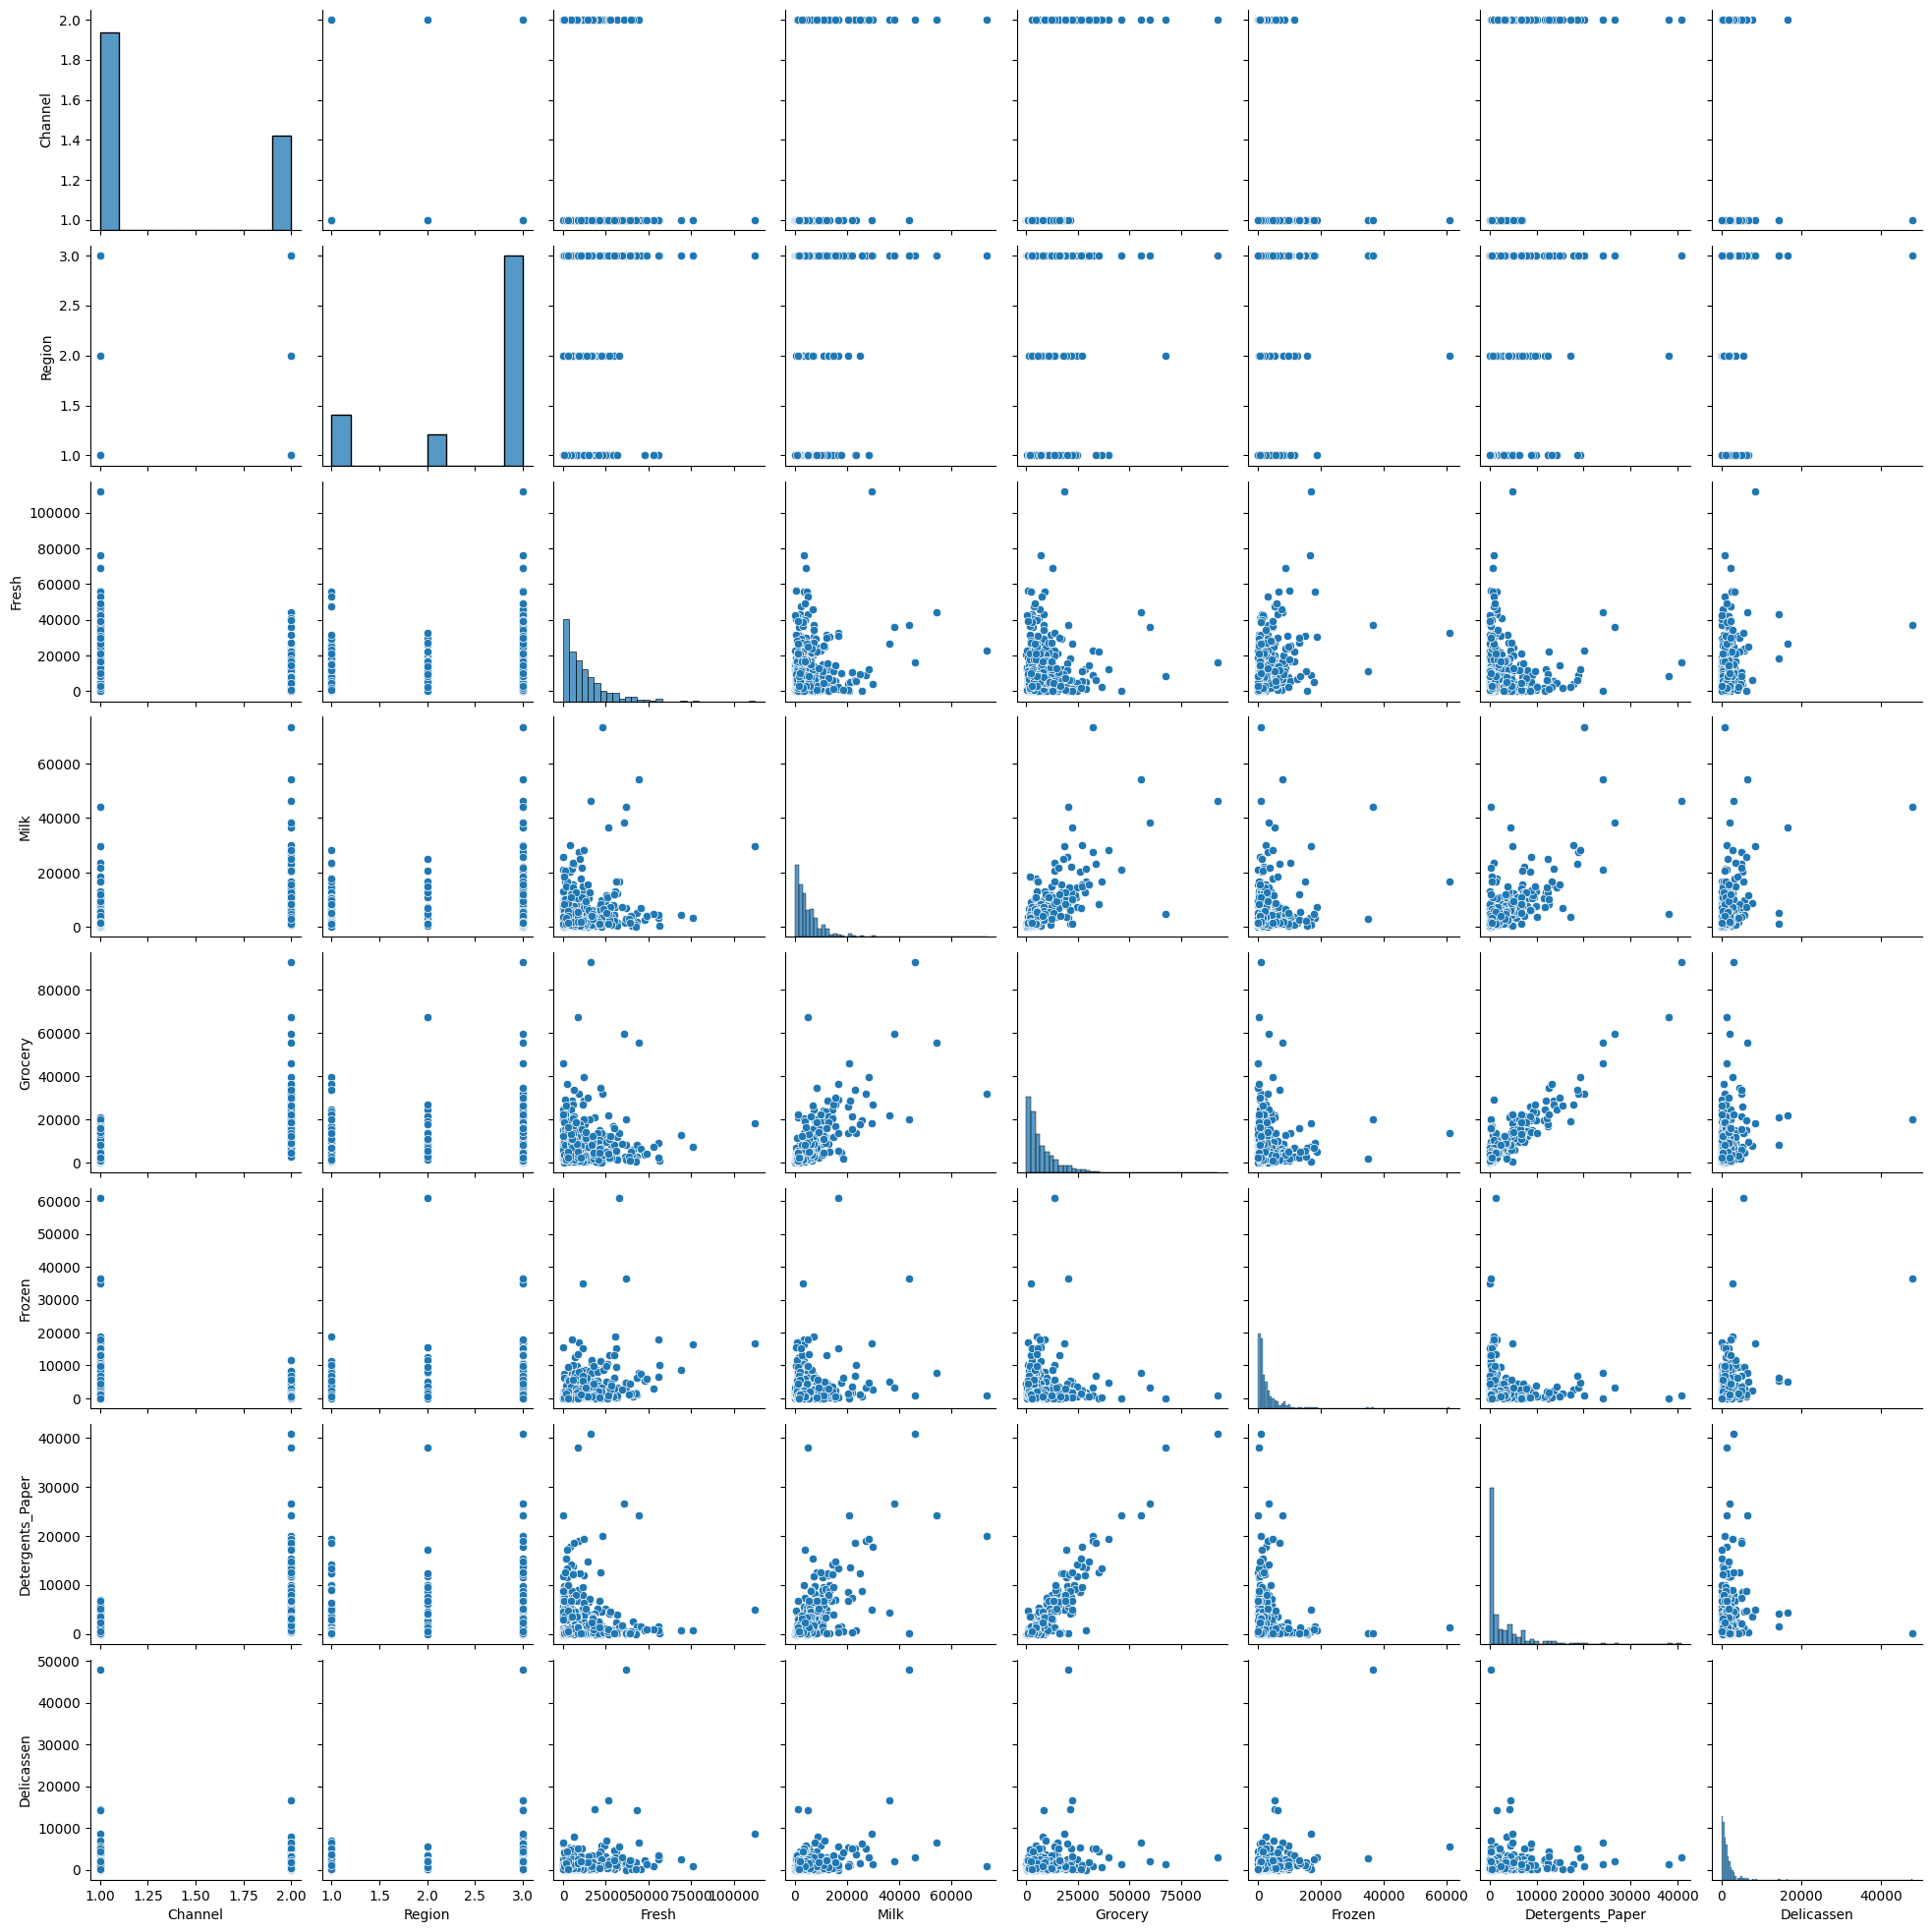

In [63]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(df)

In [65]:
x.shape

(440, 8)

**ELBOW METHOD** FOR CHECKING THE NUMBER OF CLUSTERS

In [66]:
from sklearn.cluster import KMeans

In [67]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  X=kmeans.fit(x)
  wcss.append(kmeans.inertia_)


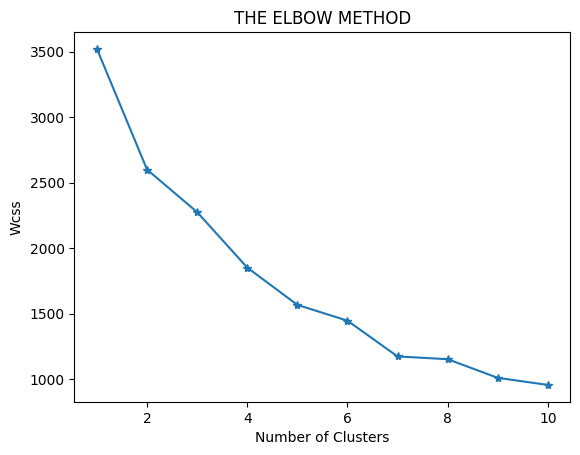

In [68]:
plt.plot(range(1,11),wcss, marker='*')
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

data is train without the **pca**

In [69]:
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(x)
y_pred=kmeans.predict(x)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       0, 3, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 2, 0, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 2, 3,
       2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 3, 0,
       2, 0, 2, 2, 3, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,

**predicting the new data**

In [71]:
new_data = [[12000, 3500, 4500, 1000, 2000, 500, 2, 3]]
new_data_scaled=sd.fit_transform(new_data)
new_data_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [78]:
test_pred=kmeans.predict(new_data_scaled)
print("Predicted cluster:",test_pred[0])

Predicted cluster: 2


PCA for lower dimension

In [88]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
comp=pca.fit_transform(x)

In [89]:
comp.shape

(440, 2)

In [93]:
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(comp)
y_pred_comp=kmeans.predict(comp)
y_pred_comp

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 4, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [94]:
y_pred.shape

(440,)

without **pca**

<function matplotlib.pyplot.show(close=None, block=None)>

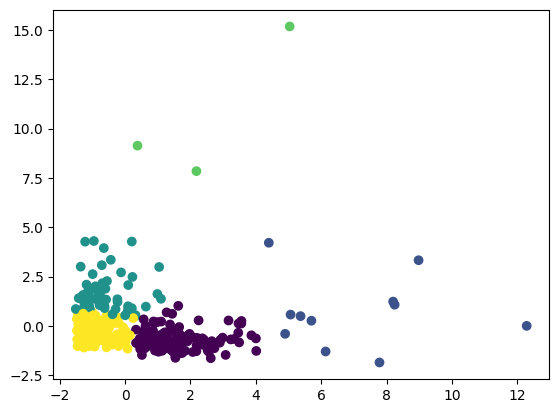

In [106]:
plt.scatter(comp[:,0],comp[:,1],c=y_pred)
plt.show

wih **pca**

<function matplotlib.pyplot.show(close=None, block=None)>

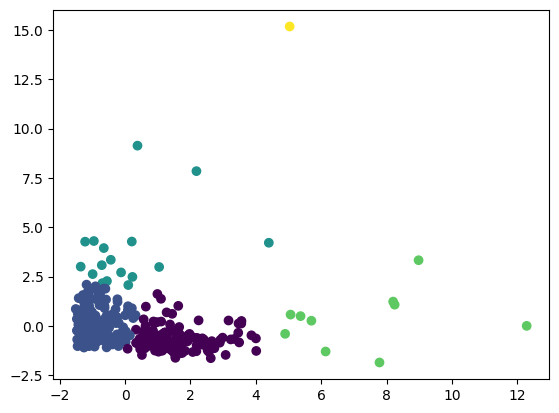

In [105]:
plt.scatter(comp[:,0],comp[:,1],c=y_pred_comp)
plt.show

**in conclusion the pca and without pca the distribution of clustring is same**